In [264]:
import os
import string
import nltk
import matplotlib.pyplot as plt

In [265]:
file = 'HarryPotter.txt'
with open(file, 'r', encoding='utf-8') as f:
    text = f.read()

In [266]:
# 불필요한 EOL 대체, 마침기호 모두 EOL로 변경
EOL = '.'
text = ' '.join([w.replace('Mr.', 'Mr').replace('Mrs.', 'Mrs').replace('...', '').replace('J.K.', 'JK').replace('Page', '.Page').replace('?', EOL).replace('!', EOL).replace(';', EOL)
        for w in text.split()])

In [267]:
# 문장 분절
text_sent = [sent for sent in text.split(sep='.') if not sent.startswith('Page')]

In [268]:
# 단어 분절
text_word = [sent.split() for sent in text_sent]

In [269]:
punct = list(string.punctuation)
my_punct = set([word[0] for sent in text_word 
                for word in sent 
                if not word[0].isalnum() and (word not in punct)])
punct.extend(list(my_punct))

In [270]:
# 단독 punct 제거
text_word = [[word for word in sent 
              if word[0].isalnum() and word not in punct]
              for sent in text_word]

In [271]:
# , ) ” 제거, ’와 -을 '로 대체
words = sum(text_word, [])
words = [word.replace(',', '').replace(')', '').replace('”', '').replace('-', '\'').replace('—', '\'').replace('’', '\'')
     for word in words ]

# 불필요한 토큰 제거
words = [word[:-1] if word.endswith('\'') else word for word in words]
remove_apos = [word.split('\'') for word in words if '\'' in word] 
remove_apos = sum(remove_apos, [])
words.extend(remove_apos)
words = [word for word in words if not '\'' in word]
words = [word.replace(':', '').replace('\\', '').replace('o/', '')
         for word in words]

In [272]:
# 불용어 제거
stop_words = nltk.corpus.stopwords.words('english')
tokens = [word.lower() for word in words if not word.lower() in stop_words]

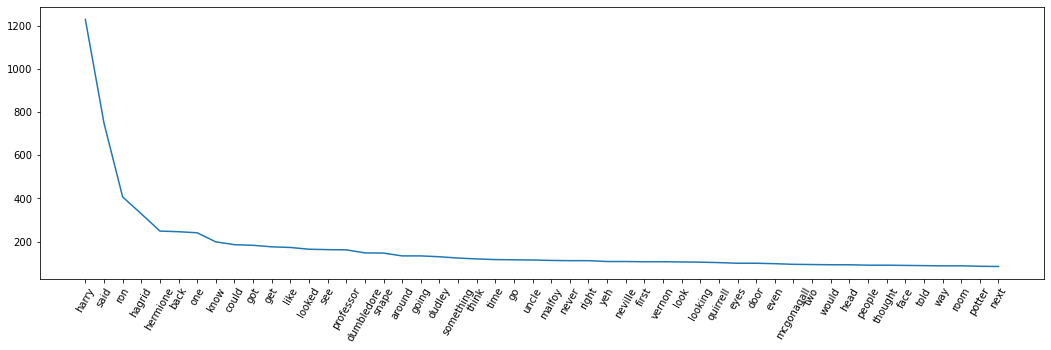

In [273]:
fdist = nltk.FreqDist(tokens)
top_fifty = {key:value for key, value in fdist.most_common(50)}
plt.figure(figsize=(18, 5))
plt.xticks(rotation=60)
plt.plot(top_fifty.keys(), top_fifty.values())

In [ ]:
print(f'총 토큰의 개수 : {len(tokens)}')